In [9]:
trial_idx = 6

In [10]:
this_trial = trials_list[trial_idx]

In [11]:
# clean this up. Probably a better way to get a float out of this

this_trial = trials_list[trial_idx]
# find the row representing trigger activation
trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
trigger_idx = trigger_event.index[0]
# normalise the trigger index to the starting index of this trial
trigger_idx = int(trigger_idx - this_trial.index[0])


In [12]:
x_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.x'].values

In [13]:
# get a trajectory from a trial
# only up to the index of the trigger
x_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.x'].values[:trigger_idx]
y_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.z'].values[:trigger_idx]

x_coords_p2 = trials_list[trial_idx]['data.playerPosition.1.location.x'].values[:trigger_idx]
y_coords_p2 = trials_list[trial_idx]['data.playerPosition.1.location.z'].values[:trigger_idx]

In [14]:
coordinate_array_labels = ['0.location.x', '0.location.y', '1.location.x', '1.location.y']
coordinate_arrays = [this_trial[f'data.playerPosition.{label}'].values[:trigger_idx] for label in coordinate_array_labels]

In [15]:
len(x_coords_p2)

249

In [16]:
this_trial.shape[0]

448

In [17]:
# find trigger activating client for this trial
trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
trigger_activating_client = trigger_event['data.triggerClient'].values[0]

In [18]:
cmap_winner = mpl.cm.spring 
cmap_loser = mpl.cm.summer
timestamps = np.arange(len(x_coords_p1))
min_val, max_val = min(timestamps), max(timestamps)
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)

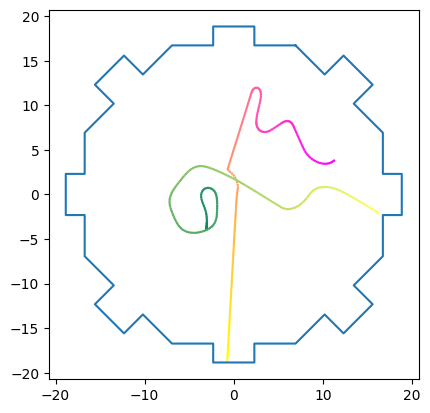

In [19]:
ax = plot_octagon.plot_octagon()
if trigger_activating_client == 0:
    cmaps = [cmap_winner, cmap_loser]
else:
    cmaps = [cmap_loser, cmap_winner]
ax.scatter(x_coords_p1, y_coords_p1, s=0.5, c=timestamps, cmap=cmaps[0], norm=norm)
ax.scatter(x_coords_p2, y_coords_p2, s=0.5, c=timestamps, cmap=cmaps[1], norm=norm)
plt.show()

In [20]:
def plot_trajectory(trials_list, trial_index=0, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer,
                   s=0.5, social=False):
    # isolate trial
    this_trial = trials_list[trial_idx]

    # isolate trigger event
    trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]

    # find index of trigger event normalised to this trial
    trigger_idx = trigger_event.index[0]
    trigger_idx = int(trigger_idx - this_trial.index[0])

    # set index for number of players to extract data for 
    end_idx = 1
    if social:
        end_idx = 3
        
    # extract position data for 1 or 2 players
    coordinate_array_labels = [globals.PLAYER_0_XLOC, globals.PLAYER_0_YLOC, globals.PLAYER_1_XLOC, globals.PLAYER_1_YLOC]
    coordinate_arrays = {label : this_trial[label].values[:trigger_idx] for label in coordinate_array_labels[0:end_idx+1]}
    
    # create colormap data
    cmap_winner = mpl.cm.spring 
    cmap_loser = mpl.cm.summer
    timestamps = np.arange(len(coordinate_arrays[globals.PLAYER_0_XLOC]))
    min_val, max_val = min(timestamps), max(timestamps)
    norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)

    # plot trajectory data
    ax = plot_octagon.plot_octagon()

    if social:
        if trigger_activating_client == 0:
            cmaps = [cmap_winner, cmap_loser]
        else:
            cmaps = [cmap_loser, cmap_winner]
        ax.scatter(coordinate_arrays[globals.PLAYER_0_XLOC], coordinate_arrays[globals.PLAYER_0_YLOC], s=0.5, c=timestamps, cmap=cmaps[0], norm=norm)
        ax.scatter(coordinate_arrays[globals.PLAYER_1_XLOC],coordinate_arrays[globals.PLAYER_1_YLOC], s=0.5, c=timestamps, cmap=cmaps[1], norm=norm)
        plt.show()
    else:
        ax.scatter(coordinate_arrays[globals.PLAYER_0_XLOC], coordinate_arrays[globals.PLAYER_0_YLOC], s=0.5, c=timestamps, cmap=cmap_winner, norm=norm)
        plt.show()

    return coordinate_arrays
    
    

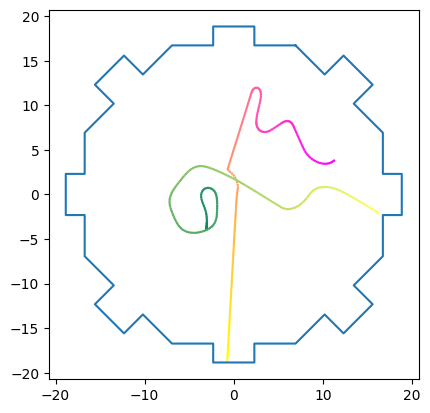

In [21]:
coord_arrays = plot_trajectory(trials_list, trial_index=trial_idx, social=preprocess.is_social(df))